In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("winequality-white.csv", sep=";")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## 3.1 Separe 70% dos dados para treino (conjunto de treino) e 30% dos dados para teste (conjunto de teste).

In [4]:
X = df.drop(columns=['quality'], axis=1).values
y = df['quality'].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

## 3.2. Crie um modelo de regressão de qualidade de vinho usando o kNN para k=5.

In [6]:
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsRegressor()

## 3.3. Use o modelo de regressão sobre X_test para calcular os valores preditos dos rótulos (y_pred).

In [7]:
y_pred = model.predict(X_test)

In [8]:
model.score(X_test, y_test)

0.1508763757631555

In [9]:
y_pred

array([5.8, 6.6, 6.2, ..., 5.8, 6.2, 6.4])

In [10]:
sns.set_theme(color_codes=True)

<AxesSubplot:>

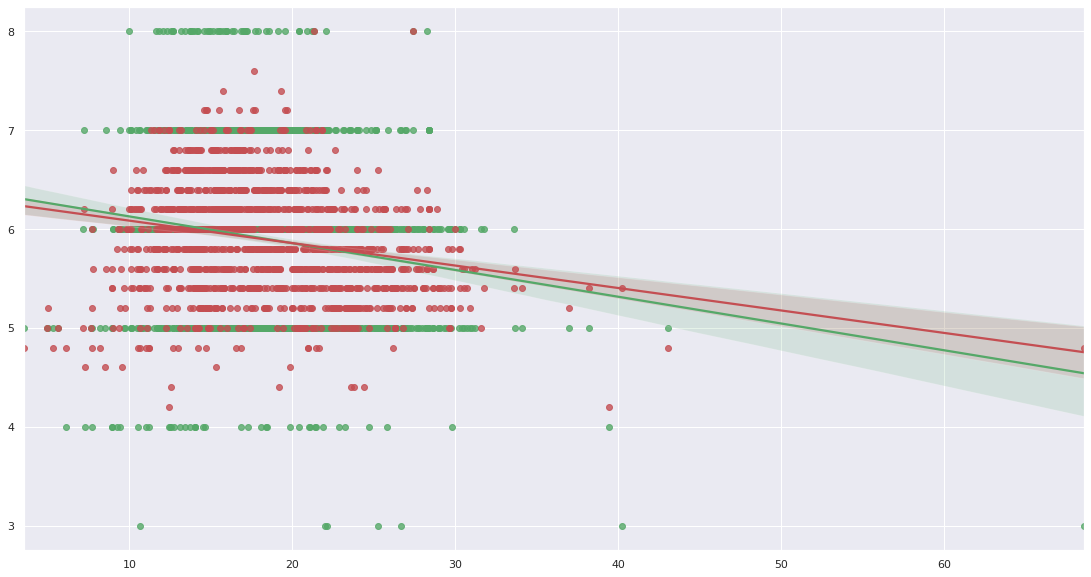

In [11]:
plt.figure(figsize=(19,10))
ax = sns.regplot(x=[np.mean(row) for row in X_test], y=y_test, color='g')
sns.regplot(x=[np.mean(row) for row in X_test], y=y_pred , ax=ax, color='r')